In [1]:
# Pandas for reading and preparing the data
import pandas as pd
# TensorFlow library. Used to implement machine learning models
import tensorflow as tf
# Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
# Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
ratings_df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_3/datasets/review-ratings.csv")
ratings_df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [3]:
# Drop irrelevant column
ratings_df = ratings_df.drop("Unnamed: 25", axis=1)
# Check the data types
ratings_df.dtypes

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

In [4]:
# Set "User" as the index
ratings_df = ratings_df.set_index("User")
ratings_df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


In [5]:
# Find problems for converting "Category 11" to float
try:
  ratings_df["Category 11"] = ratings_df["Category 11"].astype("float64")
except Exception as e:
  print(e)


could not convert string to float: '2\t2.'


In [6]:
# Find row with problem string
ratings_df.loc[ratings_df["Category 11"] == "2\t2.",:]


,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,
User 2713,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,...,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.0,2.57,2.58


In [7]:
# Remove User 2713
ratings_df = ratings_df.drop("User 2713")

In [8]:
# Convert Category 11 to float
ratings_df["Category 11"] = ratings_df["Category 11"].astype("float64")

In [9]:
# Update the column names
travel_categories = ["churches",
                     "resorts",
                     "beaches",
                     "parks",
                     "theatres",
                     "museums",
                     "malls",
                     "zoo",
                     "restaurants",
                     "pubs/bars",
                     "local services",
                     "burger/pizza shops",
                     "hotels/other lodgings",
                     "juice bars",
                     "art galleries",
                     "dance clubs",
                     "swimming pools",
                     "gyms",
                     "bakeries",
                     "beauty & spas",
                     "cafes",
                     "view points",
                     "monuments",
                     "gardens"]
ratings_df.columns = travel_categories
ratings_df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [10]:
# Create variable for normalization
# Ratings are between 0-5
normalization_factor = 5

# Normalize the ratings
normalized_ratings = ratings_df / normalization_factor
normalized_ratings

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.000,0.000,0.726,0.730,1.000,0.584,1.000,0.470,0.466,0.528,...,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
User 2,0.000,0.000,0.726,0.730,1.000,0.584,1.000,0.528,0.466,0.530,...,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
User 3,0.000,0.000,0.726,0.726,1.000,0.584,1.000,0.528,0.466,0.528,...,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
User 4,0.000,0.100,0.726,0.726,1.000,0.584,1.000,0.470,0.466,0.528,...,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
User 5,0.000,0.000,0.726,0.726,1.000,0.584,1.000,0.528,0.466,0.528,...,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.182,1.000,0.800,0.558,0.554,0.514,0.486,0.218,0.354,0.208,...,1.000,0.132,0.130,0.132,0.138,1.000,0.210,1.0,1.0,0.312
User 5453,0.186,1.000,0.804,0.558,0.556,0.514,0.354,0.214,0.352,0.204,...,0.178,0.130,0.128,0.130,0.318,0.324,0.212,1.0,1.0,0.218
User 5454,0.188,1.000,0.806,0.560,0.556,0.514,0.350,0.210,0.350,0.200,...,0.174,0.130,0.126,0.128,0.148,1.000,0.214,1.0,1.0,0.222


In [11]:
# Create the training data
X_train = normalized_ratings.values
X_train

array([[0.   , 0.   , 0.726, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.726, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.726, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.188, 1.   , 0.806, ..., 1.   , 1.   , 0.222],
       [0.19 , 0.81 , 0.81 , ..., 1.   , 1.   , 0.224],
       [0.19 , 0.814, 1.   , ..., 1.   , 1.   , 0.234]])

In [12]:
# Set values for our hidden nodes and visible nodes
hiddenUnits = 15
visibleUnits =  len(ratings_df.columns)

# Set the bias of the visible layer to 0. This should use the number of unique travel categories.
visible_layer_bias = tf.Variable(tf.zeros([visibleUnits]), tf.float32)

# Set the bias of the hidden layer to 0. This will use hiddenUnits, which is
# the number of features we're going to learn
hidden_layer_bias = tf.Variable(tf.zeros([hiddenUnits]), tf.float32)

# Set the Weights to 0
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [13]:
v0 = tf.zeros([visibleUnits], tf.float32)
# testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 15), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [14]:
# Phase 1: Input Processing
# Define a function to return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    # probabilities of the hidden units
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)
    # sample_h_given_X
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state

# Print output of zeros input
h0 = hidden_layer(v0, W, hidden_layer_bias)
print("first 15 hidden states: ", h0[0][0:15])

# Define a function to return the reconstructed output
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
    # sample_v_given_h
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]


# Get reconstructed output from zeros input
v1 = reconstructed_output(h0, W, visible_layer_bias)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.], shape=(15,), dtype=float32)
hidden state shape:  (1, 15)
v0 state shape:   (24,)
v1 state shape:   (24,)


In [15]:
# Set the error function, which in this case will be the Mean Absolute Error Function.
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.6666667


Epoch: 1 batch #: 0  of 27 sample #: 199 reconstruction error: 0.233149
Epoch: 1 batch #: 1  of 27 sample #: 199 reconstruction error: 0.309523
Epoch: 1 batch #: 2  of 27 sample #: 199 reconstruction error: 0.258800
Epoch: 1 batch #: 3  of 27 sample #: 199 reconstruction error: 0.237261
Epoch: 1 batch #: 4  of 27 sample #: 199 reconstruction error: 0.240780
Epoch: 1 batch #: 5  of 27 sample #: 199 reconstruction error: 0.249771
Epoch: 1 batch #: 6  of 27 sample #: 199 reconstruction error: 0.272604
Epoch: 1 batch #: 7  of 27 sample #: 199 reconstruction error: 0.178116
Epoch: 1 batch #: 8  of 27 sample #: 199 reconstruction error: 0.284432
Epoch: 1 batch #: 9  of 27 sample #: 199 reconstruction error: 0.186587
Epoch: 1 batch #: 10  of 27 sample #: 199 reconstruction error: 0.285054
Epoch: 1 batch #: 11  of 27 sample #: 199 reconstruction error: 0.254848
Epoch: 1 batch #: 12  of 27 sample #: 199 reconstruction error: 0.298080
Epoch: 1 batch #: 13  of 27 sample #: 199 reconstruction erro

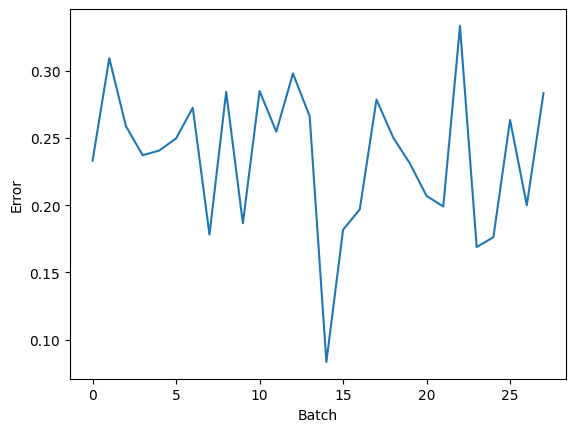

In [16]:
# Set the training variables
epochs = 1
batchsize = 200
errors = []
weights = []
K=1
alpha = 0.1

# Create dataset batches
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(X_train))).batch(batchsize)



v0_state=v0

# Train the model
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hidden_layer_bias)
                v1_state = reconstructed_output(h0_state, W, visible_layer_bias)
                h1_state = hidden_layer(v1_state, W, hidden_layer_bias)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)

                # Update weights
                W = W + alpha * delta_W

                # Update biases
                visible_layer_bias = visible_layer_bias + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hidden_layer_bias = hidden_layer_bias + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1),
                       "batch #: %i " % batch_number, "of %i" % (len(X_train)/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Batch')
plt.show()

In [17]:
# Create a test user ID to generate recommendations
mock_user_id = 24

# Select the input user
inputUser = X_train[mock_user_id-1].reshape(1, -1)

inputUser = tf.convert_to_tensor(X_train[mock_user_id-1],"float32")
v0 = inputUser

print(v0)
v0.shape

tf.Tensor(
[0.    0.102 1.    0.732 0.59  0.588 0.59  0.594 0.342 0.462 0.33  0.328
 0.328 0.254 0.338 0.136 0.    0.    0.    0.    0.    0.    0.    0.   ], shape=(24,), dtype=float32)


TensorShape([24])

In [18]:
# Create a test tensor
v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape

TensorShape([24])

In [19]:
# Feed in the user and reconstruct the input

hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hidden_layer_bias)

vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + visible_layer_bias)

rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor(
[0.55587316 0.68644387 0.6259049  0.43787843 0.61974406 0.4508984
 0.46489593 0.17477283 0.24954149 0.24470943 0.21209413 0.20291466
 0.26087338 0.2721471  0.43857583 0.2067144  0.19939885 0.17132738
 0.37059835 0.53337854 0.36320013 0.8468416  0.68189263 0.34368938], shape=(24,), dtype=float32)


In [20]:
# Create a DataFrame of recommendations
scored_travel_df_mock = pd.DataFrame({"category": ratings_df.columns})
scored_travel_df_mock = scored_travel_df_mock.assign(RecommendationScore = rec[0])
scored_travel_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,category,RecommendationScore
21,view points,0.846842
1,resorts,0.686444
22,monuments,0.681893
2,beaches,0.625905
4,theatres,0.619744
0,churches,0.555873
19,beauty & spas,0.533379
6,malls,0.464896
5,museums,0.450898
14,art galleries,0.438576


In [21]:
# Create a DataFrame for our mock user
# Note that 0 scores indicate the user has not rated anything in that category
travel_df_mock = pd.DataFrame(ratings_df.loc["User " + str(mock_user_id),:]).reset_index().rename(columns={"index": "category"})
travel_df_mock

,category,User 24
0,churches,0.00
1,resorts,0.51
2,beaches,5.00
3,parks,3.66
4,theatres,2.95
5,museums,2.94
6,malls,2.95
7,zoo,2.97
8,restaurants,1.71
9,pubs/bars,2.31


In [23]:
# Merge travel_df_mock with scored_travel_df_mock by category
merged_df_mock = scored_travel_df_mock.merge(travel_df_mock, on='category', how='outer')
merged_df_mock["Normalized User score"] = merged_df_mock["User " + str(mock_user_id)] / normalization_factor
merged_df_mock = merged_df_mock.drop(columns=["User " + str(mock_user_id)])
merged_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,category,RecommendationScore,Normalized User score
21,view points,0.846842,0.000
1,resorts,0.686444,0.102
22,monuments,0.681893,0.000
2,beaches,0.625905,1.000
4,theatres,0.619744,0.590
0,churches,0.555873,0.000
19,beauty & spas,0.533379,0.000
6,malls,0.464896,0.590
5,museums,0.450898,0.588
14,art galleries,0.438576,0.338
